In [1]:
import os
import re
import json
import gzip
import numpy as np
import pandas as pd
from urllib.request import urlopen

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [3]:
df = getDF('/home/yuqihang/workroot/models/data/recsys/Amazon/Toys_and_Games.json.gz')

In [4]:
df.head(2)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,image,style
0,2.0,12,False,"09 22, 2016",A1IDMI31WEANAF,0020232233,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN,NaN
1,1.0,21,False,"09 18, 2016",A4BCEVVZ4Y3V3,0020232233,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN,NaN


In [5]:
metadata = []
with gzip.open('/home/yuqihang/workroot/models/data/recsys/Amazon/meta_Toys_and_Games.json.gz') as f:
    for l in f:
        metadata.append(json.loads(l.strip()))

In [6]:
# total length of list, this number equals total number of products
print(len(metadata))

# first row of the list
print(metadata[0])

# convert list into pandas dataframe

df_meta = pd.DataFrame.from_dict(metadata)

print(len(df_meta))

633883
{'category': ['Toys & Games', 'Puzzles', 'Jigsaw Puzzles'], 'tech1': '', 'description': ["Three Dr. Suess' Puzzles: Green Eggs and Ham, Favorite Friends, and One Fish Two Fish Red Fish Blue Fish"], 'fit': '', 'title': 'Dr. Suess 19163 Dr. Seuss Puzzle 3 Pack Bundle', 'also_buy': [], 'tech2': '', 'brand': 'Dr. Seuss', 'feature': ['Three giant floor puzzles', 'Includes: Dr. Suess Green Eggs and Ham, Favorite Friends, and One Fish Two Fish Blue Fish', 'Each puzzle has 48 pieces', 'Ages 3 and up'], 'rank': ['>#2,230,717 in Toys & Games (See Top 100 in Toys & Games)', '>#57,419 in Toys & Games > Puzzles > Jigsaw Puzzles'], 'also_view': [], 'main_cat': 'Toys & Games', 'similar_item': '', 'date': '', 'price': '', 'asin': '0000191639', 'imageURL': ['https://images-na.ssl-images-amazon.com/images/I/51rn8TxbcoL._SS40_.jpg', 'https://images-na.ssl-images-amazon.com/images/I/51j1Fep1niL._SS40_.jpg'], 'imageURLHighRes': ['https://images-na.ssl-images-amazon.com/images/I/51rn8TxbcoL.jpg', 'ht

In [7]:
df_meta.head(5)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Toys & Games, Puzzles, Jigsaw Puzzles]",,"[Three Dr. Suess' Puzzles: Green Eggs and Ham,...",,Dr. Suess 19163 Dr. Seuss Puzzle 3 Pack Bundle,[],,Dr. Seuss,"[Three giant floor puzzles, Includes: Dr. Sues...","[>#2,230,717 in Toys & Games (See Top 100 in T...",[],Toys & Games,,,,0000191639,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,[],,[<b>Prepare to be Afraid!</b><br /><br />The B...,,Pathfinder: Book of Beasts - Legendary Foes,[],,Pathfinder Roleplaying Jon Brazer Productions,[],"[>#2,294,535 in Toys & Games (See Top 100 in T...",[],Toys & Games,,,.a-box-inner{background-color:#fff}#alohaBuyBo...,0004950763,[],[],NaN
2,[],,[],,Nursery Rhymes Felt Book,[],,Betty Lukens,[],"[>#2,871,983 in Toys & Games (See Top 100 in T...",[],Toys & Games,,,.a-box-inner{background-color:#fff}#alohaBuyBo...,0005069491,[],[],NaN
3,"[Toys & Games, Games, Card Games]",,[Blitz Vintage Card Game],,Dutch Blitz Card Game,[B00WIIPQEC],,Dutch Blitz Games Co,[],"[>#376,337 in Toys & Games (See Top 100 in Toy...","[B000BBU0KS, B00NQQTZ5G, B00WIIPQEC, B001VIWAO...",Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$24.95,0004983289,[],[],NaN
4,[],,"[Marvel SuperHeroes themed ""magic ink"" colorin...",,Magic Pen Painting (Marvel Super Heroes),"[B009SB7TI8, B009SB8Z1I]",,Lee Publications,[],"[>#934,954 in Toys & Games (See Top 100 in Toy...",[],Toys & Games,,,$4.92,0006466222,[],[],NaN


In [8]:
df3 = df_meta.fillna('')
df4 = df3[df3.title.str.contains('getTime')] # unformatted rows
df5 = df3[~df3.title.str.contains('getTime')] # filter those unformatted rows
print(len(df4))
print(len(df5))

0
633883


In [9]:
# df['rating'].dropna().describe()
df['overall'].dropna().describe()

count    8.201231e+06
mean     4.229314e+00
std      1.280496e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64

In [10]:
df.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'image',
       'style'],
      dtype='object')

In [11]:
rating = df[['asin','reviewerID','overall','unixReviewTime','reviewText','summary']]
# rating = df[['rating','timestamp','user_id','asin','helpful_vote']]
rating.head(2) 

,asin,reviewerID,overall,unixReviewTime,reviewText,summary
0,0020232233,A1IDMI31WEANAF,2.0,1474502400,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,0020232233,A4BCEVVZ4Y3V3,1.0,1474156800,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...


In [12]:
rating['overall'].describe()

count    8.201231e+06
mean     4.229314e+00
std      1.280496e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64

In [13]:
# rating = rating[['asin','reviewerID','overall','unixReviewTime']]
# rating = rating[['asin','user_id','rating','timestamp']]
rating.columns = ['asin','user','rating','timestamp','review','summary']

In [14]:
df5.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')

In [15]:
# meta_data = df5[['asin','category','title','brand','price']]
meta_data = df5[['asin','category','title','description','price','brand']]
# meta_data.columns = ['asin','category','title','brand','price']
meta_data.head(2)

,asin,category,title,description,price,brand
0,0000191639,"[Toys & Games, Puzzles, Jigsaw Puzzles]",Dr. Suess 19163 Dr. Seuss Puzzle 3 Pack Bundle,"[Three Dr. Suess' Puzzles: Green Eggs and Ham,...",,Dr. Seuss
1,0004950763,[],Pathfinder: Book of Beasts - Legendary Foes,[<b>Prepare to be Afraid!</b><br /><br />The B...,.a-box-inner{background-color:#fff}#alohaBuyBo...,Pathfinder Roleplaying Jon Brazer Productions


In [16]:
meta_data.shape

(633883, 6)

In [17]:
meta_data['title'] = meta_data['title'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&','')))
meta_data['title'] = meta_data['title'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))

/tmp/ipykernel_2145651/2482686894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data['title'] = meta_data['title'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&','')))
/tmp/ipykernel_2145651/2482686894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data['title'] = meta_data['title'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))


In [18]:
meta_data = meta_data.drop_duplicates(subset=['asin'],keep='last')
# meta_data = meta_data.drop_duplicates(subset=['title'],keep='last')
meta_data.shape

(624284, 6)

In [19]:
len(set(meta_data['title']))

617895

In [20]:
meta_data.head(2)

,asin,category,title,description,price,brand
0,0000191639,"[Toys & Games, Puzzles, Jigsaw Puzzles]",Dr. Suess 19163 Dr. Seuss Puzzle 3 Pack Bundle,"[Three Dr. Suess' Puzzles: Green Eggs and Ham,...",,Dr. Seuss
1,0004950763,[],Pathfinder: Book of Beasts - Legendary Foes,[<b>Prepare to be Afraid!</b><br /><br />The B...,.a-box-inner{background-color:#fff}#alohaBuyBo...,Pathfinder Roleplaying Jon Brazer Productions


In [21]:
data = rating.merge(meta_data,on='asin',how='right')

In [22]:
data.head(2)

,asin,user,rating,timestamp,review,summary,category,title,description,price,brand
0,0000191639,AMEVO2LY6VEJA,5.0,1.388016e+09,"Great product, thank you! Our son loved the pu...",Puzzles,"[Toys & Games, Puzzles, Jigsaw Puzzles]",Dr. Suess 19163 Dr. Seuss Puzzle 3 Pack Bundle,"[Three Dr. Suess' Puzzles: Green Eggs and Ham,...",,Dr. Seuss
1,0004950763,A3H4ZZTMCQK1A2,5.0,1.444781e+09,Truly amazing,Five Stars,[],Pathfinder: Book of Beasts - Legendary Foes,[<b>Prepare to be Afraid!</b><br /><br />The B...,.a-box-inner{background-color:#fff}#alohaBuyBo...,Pathfinder Roleplaying Jon Brazer Productions


In [23]:
data.shape

(8191697, 11)

In [24]:
data.dropna(subset=['user'], inplace=True)
data.dropna(subset=['asin'], inplace=True)
data.dropna(subset=['title'], inplace=True)
data.dropna(subset=['timestamp'], inplace=True)

In [25]:
data.shape

(8191674, 11)

In [26]:
data.head()

,asin,user,rating,timestamp,review,summary,category,title,description,price,brand
0,0000191639,AMEVO2LY6VEJA,5.0,1.388016e+09,"Great product, thank you! Our son loved the pu...",Puzzles,"[Toys & Games, Puzzles, Jigsaw Puzzles]",Dr. Suess 19163 Dr. Seuss Puzzle 3 Pack Bundle,"[Three Dr. Suess' Puzzles: Green Eggs and Ham,...",,Dr. Seuss
1,0004950763,A3H4ZZTMCQK1A2,5.0,1.444781e+09,Truly amazing,Five Stars,[],Pathfinder: Book of Beasts - Legendary Foes,[<b>Prepare to be Afraid!</b><br /><br />The B...,.a-box-inner{background-color:#fff}#alohaBuyBo...,Pathfinder Roleplaying Jon Brazer Productions
2,0005069491,A3C9CSW3TJITGT,4.0,1.377562e+09,I love these felt nursery rhyme characters and...,Charming characters but busy work required,[],Nursery Rhymes Felt Book,[],.a-box-inner{background-color:#fff}#alohaBuyBo...,Betty Lukens
3,0004983289,ASZZ869682237,5.0,1.522195e+09,Love this game!!! Game came with 4 different c...,Fun Game!!,"[Toys & Games, Games, Card Games]",Dutch Blitz Card Game,[Blitz Vintage Card Game],$24.95,Dutch Blitz Games Co
4,0004983289,A2N9CIXRV5BBKM,5.0,1.497139e+09,"Love this game! It's fast, entertaining and j...",Five Stars,"[Toys & Games, Games, Card Games]",Dutch Blitz Card Game,[Blitz Vintage Card Game],$24.95,Dutch Blitz Games Co


In [27]:
#查看title列数据类型
type(data['category'][0]),type(data['description'][0]),type(data['title'][0]),type(data['price'][0]),type(data['brand'][0]),type(data['review'][0]),type(data['summary'][0])

(list, list, str, str, str, str, str)

In [28]:
data['description'] = data['description'].apply(lambda x: ', '.join(x) if x else '')
data['category'] = data['category'].apply(lambda x: ', '.join(x[1:]) if x else '')

In [29]:
data.head(5)

,asin,user,rating,timestamp,review,summary,category,title,description,price,brand
0,0000191639,AMEVO2LY6VEJA,5.0,1.388016e+09,"Great product, thank you! Our son loved the pu...",Puzzles,"Puzzles, Jigsaw Puzzles",Dr. Suess 19163 Dr. Seuss Puzzle 3 Pack Bundle,"Three Dr. Suess' Puzzles: Green Eggs and Ham, ...",,Dr. Seuss
1,0004950763,A3H4ZZTMCQK1A2,5.0,1.444781e+09,Truly amazing,Five Stars,,Pathfinder: Book of Beasts - Legendary Foes,<b>Prepare to be Afraid!</b><br /><br />The Bo...,.a-box-inner{background-color:#fff}#alohaBuyBo...,Pathfinder Roleplaying Jon Brazer Productions
2,0005069491,A3C9CSW3TJITGT,4.0,1.377562e+09,I love these felt nursery rhyme characters and...,Charming characters but busy work required,,Nursery Rhymes Felt Book,,.a-box-inner{background-color:#fff}#alohaBuyBo...,Betty Lukens
3,0004983289,ASZZ869682237,5.0,1.522195e+09,Love this game!!! Game came with 4 different c...,Fun Game!!,"Games, Card Games",Dutch Blitz Card Game,Blitz Vintage Card Game,$24.95,Dutch Blitz Games Co
4,0004983289,A2N9CIXRV5BBKM,5.0,1.497139e+09,"Love this game! It's fast, entertaining and j...",Five Stars,"Games, Card Games",Dutch Blitz Card Game,Blitz Vintage Card Game,$24.95,Dutch Blitz Games Co


In [30]:
rating_ = data.copy()
rating_.head(2)

,asin,user,rating,timestamp,review,summary,category,title,description,price,brand
0,0000191639,AMEVO2LY6VEJA,5.0,1.388016e+09,"Great product, thank you! Our son loved the pu...",Puzzles,"Puzzles, Jigsaw Puzzles",Dr. Suess 19163 Dr. Seuss Puzzle 3 Pack Bundle,"Three Dr. Suess' Puzzles: Green Eggs and Ham, ...",,Dr. Seuss
1,0004950763,A3H4ZZTMCQK1A2,5.0,1.444781e+09,Truly amazing,Five Stars,,Pathfinder: Book of Beasts - Legendary Foes,<b>Prepare to be Afraid!</b><br /><br />The Bo...,.a-box-inner{background-color:#fff}#alohaBuyBo...,Pathfinder Roleplaying Jon Brazer Productions


In [31]:
rating_.columns = ['iid','uid','rating','timestamp', 'review', 'summary', 'category','title','description','price','brand']
rating_.head(2)

,iid,uid,rating,timestamp,review,summary,category,title,description,price,brand
0,0000191639,AMEVO2LY6VEJA,5.0,1.388016e+09,"Great product, thank you! Our son loved the pu...",Puzzles,"Puzzles, Jigsaw Puzzles",Dr. Suess 19163 Dr. Seuss Puzzle 3 Pack Bundle,"Three Dr. Suess' Puzzles: Green Eggs and Ham, ...",,Dr. Seuss
1,0004950763,A3H4ZZTMCQK1A2,5.0,1.444781e+09,Truly amazing,Five Stars,,Pathfinder: Book of Beasts - Legendary Foes,<b>Prepare to be Afraid!</b><br /><br />The Bo...,.a-box-inner{background-color:#fff}#alohaBuyBo...,Pathfinder Roleplaying Jon Brazer Productions


In [32]:
date_min = pd.to_datetime(rating_.timestamp,unit='s').min()
date_max = pd.to_datetime(rating_.timestamp,unit='s').max()
date_min,date_max

(Timestamp('1999-10-06 00:00:00'), Timestamp('2018-10-05 00:00:00'))

In [33]:
rating_.shape

(8191674, 11)

In [33]:
date_gap = (date_max-date_min)//(19*2)
date_gap

Timedelta('215 days 00:00:00')

In [34]:
rating_['time'] = pd.to_datetime(rating_.timestamp, unit='s').map(lambda x: x.year )

In [35]:
rating_.head(2)

,iid,uid,rating,timestamp,review,summary,category,title,description,price,brand,time
0,0000191639,AMEVO2LY6VEJA,5.0,1.388016e+09,"Great product, thank you! Our son loved the pu...",Puzzles,"Puzzles, Jigsaw Puzzles",Dr. Suess 19163 Dr. Seuss Puzzle 3 Pack Bundle,"Three Dr. Suess' Puzzles: Green Eggs and Ham, ...",,Dr. Seuss,2013
1,0004950763,A3H4ZZTMCQK1A2,5.0,1.444781e+09,Truly amazing,Five Stars,,Pathfinder: Book of Beasts - Legendary Foes,<b>Prepare to be Afraid!</b><br /><br />The Bo...,.a-box-inner{background-color:#fff}#alohaBuyBo...,Pathfinder Roleplaying Jon Brazer Productions,2015


In [36]:
import numpy as np
np.sort(rating_.time.unique())

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [37]:
rating_.uid.unique().shape, rating_.iid.unique().shape

((4202996,), (624261,))

In [38]:
rating_.head()

,iid,uid,rating,timestamp,review,summary,category,title,description,price,brand,time
0,0000191639,AMEVO2LY6VEJA,5.0,1.388016e+09,"Great product, thank you! Our son loved the pu...",Puzzles,"Puzzles, Jigsaw Puzzles",Dr. Suess 19163 Dr. Seuss Puzzle 3 Pack Bundle,"Three Dr. Suess' Puzzles: Green Eggs and Ham, ...",,Dr. Seuss,2013
1,0004950763,A3H4ZZTMCQK1A2,5.0,1.444781e+09,Truly amazing,Five Stars,,Pathfinder: Book of Beasts - Legendary Foes,<b>Prepare to be Afraid!</b><br /><br />The Bo...,.a-box-inner{background-color:#fff}#alohaBuyBo...,Pathfinder Roleplaying Jon Brazer Productions,2015
2,0005069491,A3C9CSW3TJITGT,4.0,1.377562e+09,I love these felt nursery rhyme characters and...,Charming characters but busy work required,,Nursery Rhymes Felt Book,,.a-box-inner{background-color:#fff}#alohaBuyBo...,Betty Lukens,2013
3,0004983289,ASZZ869682237,5.0,1.522195e+09,Love this game!!! Game came with 4 different c...,Fun Game!!,"Games, Card Games",Dutch Blitz Card Game,Blitz Vintage Card Game,$24.95,Dutch Blitz Games Co,2018
4,0004983289,A2N9CIXRV5BBKM,5.0,1.497139e+09,"Love this game! It's fast, entertaining and j...",Five Stars,"Games, Card Games",Dutch Blitz Card Game,Blitz Vintage Card Game,$24.95,Dutch Blitz Games Co,2017


In [54]:
rating__ = rating_.copy()

In [55]:
s_rating = rating__[rating__.time.isin([2015,2016,2017,2018])].copy()
s_rating['time'] = pd.to_datetime(s_rating.timestamp, unit='s').map(lambda x: (x.year-2015)*12+x.month)
# s_rating = s_rating[s_rating.time.isin(range(1,13))]

In [56]:
s_rating.shape

(5788797, 12)

In [32]:
s_rating.shape

(7281147, 9)

In [57]:
s_rating.groupby('uid').agg({"rating":'count'}).describe()

,rating
count,3.118455e+06
mean,1.856303e+00
std,2.707235e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,4.410000e+02


In [33]:
s_rating.groupby('uid').agg({"rating":'count'}).describe()

,rating
count,3.330909e+06
mean,2.185934e+00
std,6.108465e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,1.294000e+03


In [58]:
item_info = s_rating.groupby('iid').agg({"rating":'count'})
user_info = s_rating.groupby('uid').agg({"rating":'count'})

In [60]:
active_item = item_info[item_info['rating']>15].index #.sample(frac=10/20,random_state=2023).index
active_user = user_info[user_info['rating']>15].index #.sample(frac=10/20,random_state=2023).index
active_item.shape, active_user.shape

((61403,), (16105,))

In [41]:
active_item = item_info[item_info['rating']>20].index #.sample(frac=10/20,random_state=2023).index
active_user = user_info[user_info['rating']>20].index #.sample(frac=10/20,random_state=2023).index
active_item.shape, active_user.shape

((68023,), (24291,))

In [61]:
s_rating = s_rating[s_rating['uid'].isin(active_user)]
s_rating = s_rating[s_rating['iid'].isin(active_item)]
s_rating.shape

(300497, 12)

In [36]:
s_rating = s_rating[s_rating['uid'].isin(active_user)]
s_rating = s_rating[s_rating['iid'].isin(active_item)]
s_rating.shape

(845689, 9)

In [62]:
item_info = s_rating.groupby('iid').agg({"rating":'count'})
user_info = s_rating.groupby('uid').agg({"rating":'count'})
user_info.mean(), item_info.mean()

(rating    18.779889
 dtype: float64,
 rating    5.99591
 dtype: float64)

In [37]:
item_info = s_rating.groupby('iid').agg({"rating":'count'})
user_info = s_rating.groupby('uid').agg({"rating":'count'})
user_info.mean(), item_info.mean()

(rating    34.018061
 dtype: float64,
 rating    16.628436
 dtype: float64)

In [63]:
s_rating.shape, s_rating.uid.unique().shape, s_rating.iid.unique().shape

((300497, 12), (16001,), (50117,))

In [38]:
s_rating.shape, s_rating.uid.unique().shape, s_rating.iid.unique().shape

((845689, 9), (24860,), (50858,))

In [64]:
s_rating = s_rating.reset_index()
s_rating.head(2)

,index,iid,uid,rating,timestamp,review,summary,category,title,description,price,brand,time
0,174,0486427706,ALLSNTNR6N6UL,5.0,1.432426e+09,"Exactly as described, nice pictures, great tra...","nice pictures, great transaction","Arts & Crafts, Drawing & Painting Supplies, Dr...",DOVER PUBLICATIONS Stained Glass Color Book Wi...,Product is unique and carries its own natural ...,$5.68,Dover Publications,5
1,196,0486448789,A3OJCR7TKQIPQM,5.0,1.433894e+09,Very Cute!,Very Cute!,"Arts & Crafts, Stickers",Dover Publications-Create Your Own Robot Stickers,<div>This space age character is likely to pop...,$3.04,Dover Publications,6


<Axes: xlabel='time'>

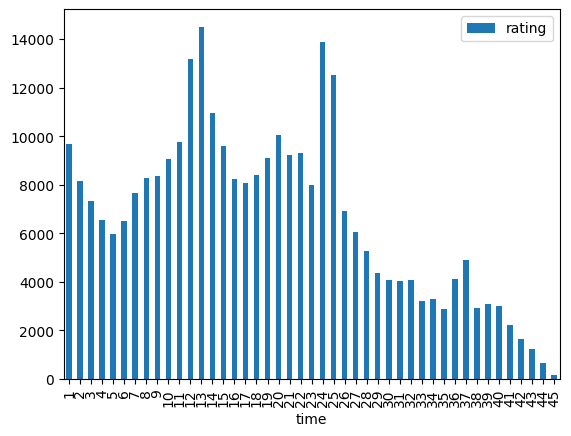

In [65]:
s_rating.groupby('time').agg({'rating':'count'}).reset_index().plot(x='time',kind='bar')

In [66]:
s_rating.rating.unique()

array([5., 3., 4., 1., 2.])

In [67]:
s_rating['label'] = s_rating['rating'].apply(lambda x: 1 if x>=5 else 0)
s_rating['label'].describe()

count    300497.000000
mean          0.735132
std           0.441264
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: label, dtype: float64

In [42]:
s_rating['label'] = s_rating['rating'].apply(lambda x: 1 if x>=5 else 0)
s_rating['label'].describe()

count    845689.00000
mean          0.63175
std           0.48233
min           0.00000
25%           0.00000
50%           1.00000
75%           1.00000
max           1.00000
Name: label, dtype: float64

In [68]:
users = s_rating.uid.unique()
items = s_rating.iid.unique()
users_map = dict(zip(users, np.arange(users.shape[0])+1))
items_map = dict(zip(items, np.arange(items.shape[0])+1))
s_rating['uid'] = s_rating['uid'].map(users_map)
s_rating['iid'] = s_rating['iid'].map(items_map)
s_rating.uid.max(), s_rating.iid.max()

(16001, 50117)

In [69]:
s_rating.head()

,index,iid,uid,rating,timestamp,review,summary,category,title,description,price,brand,time,label
0,174,1,1,5.0,1.432426e+09,"Exactly as described, nice pictures, great tra...","nice pictures, great transaction","Arts & Crafts, Drawing & Painting Supplies, Dr...",DOVER PUBLICATIONS Stained Glass Color Book Wi...,Product is unique and carries its own natural ...,$5.68,Dover Publications,5,1
1,196,2,2,5.0,1.433894e+09,Very Cute!,Very Cute!,"Arts & Crafts, Stickers",Dover Publications-Create Your Own Robot Stickers,<div>This space age character is likely to pop...,$3.04,Dover Publications,6,1
2,201,2,3,5.0,1.426637e+09,AGE APPROPIATE. G'SON LOVED,Five Stars,"Arts & Crafts, Stickers",Dover Publications-Create Your Own Robot Stickers,<div>This space age character is likely to pop...,$3.04,Dover Publications,3,1
3,203,2,4,3.0,1.425514e+09,This is a tiny book. Only a few pages of stick...,"Worked for a trip, Only a few pages","Arts & Crafts, Stickers",Dover Publications-Create Your Own Robot Stickers,<div>This space age character is likely to pop...,$3.04,Dover Publications,3,0
4,278,2,5,5.0,1.451347e+09,This one you assemble a robot,These are cute,"Arts & Crafts, Stickers",Dover Publications-Create Your Own Robot Stickers,<div>This space age character is likely to pop...,$3.04,Dover Publications,12,1


In [72]:
s_rating['review'] = s_rating['review'].fillna('')
s_rating['summary'] = s_rating['summary'].fillna('')

In [73]:
s_rating['description'] = s_rating['description'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&',' and ')))
s_rating['description'] = s_rating['description'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
s_rating['title'] = s_rating['title'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&',' and ')))
s_rating['title'] = s_rating['title'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
s_rating['category'] = s_rating['category'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&',' and ')))
s_rating['category'] = s_rating['category'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
s_rating['brand'] = s_rating['brand'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&',' and ')))
s_rating['brand'] = s_rating['brand'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
s_rating['price'] = s_rating['price'].apply(lambda x: re.sub(r'^(?!\$[0-9]).*', '', x.strip()))
s_rating['price'] = s_rating['price'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
s_rating['review'] = s_rating['review'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&',' and ')))
s_rating['review'] = s_rating['review'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
s_rating['summary'] = s_rating['summary'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&',' and' )))
s_rating['summary'] = s_rating['summary'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))

In [74]:
s_rating.head()

,index,iid,uid,rating,timestamp,review,summary,category,title,description,price,brand,time,label
0,174,1,1,5.0,1.432426e+09,"Exactly as described, nice pictures, great tra...","nice pictures, great transaction","Arts and Crafts, Drawing and Painting Supplies...",DOVER PUBLICATIONS Stained Glass Color Book Wi...,Product is unique and carries its own natural ...,$5.68,Dover Publications,5,1
1,196,2,2,5.0,1.433894e+09,Very Cute!,Very Cute!,"Arts and Crafts, Stickers",Dover Publications-Create Your Own Robot Stickers,This space age character is likely to pop up w...,$3.04,Dover Publications,6,1
2,201,2,3,5.0,1.426637e+09,AGE APPROPIATE. G'SON LOVED,Five Stars,"Arts and Crafts, Stickers",Dover Publications-Create Your Own Robot Stickers,This space age character is likely to pop up w...,$3.04,Dover Publications,3,1
3,203,2,4,3.0,1.425514e+09,This is a tiny book. Only a few pages of stick...,"Worked for a trip, Only a few pages","Arts and Crafts, Stickers",Dover Publications-Create Your Own Robot Stickers,This space age character is likely to pop up w...,$3.04,Dover Publications,3,0
4,278,2,5,5.0,1.451347e+09,This one you assemble a robot,These are cute,"Arts and Crafts, Stickers",Dover Publications-Create Your Own Robot Stickers,This space age character is likely to pop up w...,$3.04,Dover Publications,12,1


In [75]:
s_rating.tail()

,index,iid,uid,rating,timestamp,review,summary,category,title,description,price,brand,time,label
300492,8191571,50116,10459,5.0,1.534032e+09,These work well and are a nice change from the...,Good value,"Hobbies, Remote and App Controlled Vehicles an...",Geilienergy 6V 2000mAh NiMH RX Battery Packs w...,,$10.99,GEILIENERGY,44,1
300493,8191628,50117,9819,5.0,1.527034e+09,I brought my 2 year old daughter to my doctor ...,she lit up with joy to receive it,"Learning and Education, Early Development Toys...",Lewo Wooden Baby Toddler Toys Circle First Bea...,,$19.99,Lewo,41,1
300494,8191631,50117,5582,2.0,1.524701e+09,I would give it 5 starts for how much my kids ...,Choking hazard beads come off ours!! Glue the ...,"Learning and Education, Early Development Toys...",Lewo Wooden Baby Toddler Toys Circle First Bea...,,$19.99,Lewo,40,0
300495,8191633,50117,1585,4.0,1.519171e+09,It's a cute toy for what it is. I'd originally...,Cute.,"Learning and Education, Early Development Toys...",Lewo Wooden Baby Toddler Toys Circle First Bea...,,$19.99,Lewo,38,0
300496,8191663,50117,1306,5.0,1.509754e+09,perfect for a little one,love it,"Learning and Education, Early Development Toys...",Lewo Wooden Baby Toddler Toys Circle First Bea...,,$19.99,Lewo,35,1


In [76]:
s_rating.iid.unique().shape

(50117,)

In [77]:
id2title = {}
# title2id = {}
for i in range(len(s_rating)):
    iid = int(s_rating.iloc[i]['iid'])
    title = str(s_rating.iloc[i]['title'])
    description = str(s_rating.iloc[i]['description'])
    category = str(s_rating.iloc[i]['category'])
    brand = str(s_rating.iloc[i]['brand'])
    price = str(s_rating.iloc[i]['price'])
    if iid not in id2title:
        id2title[iid] = {
            'title':title,
            'description':description,
            'category':category,
            'brand':brand,
            'price':price,
            }
print(len(id2title.keys()))
# print(len(id2title.keys()),len(title2id.keys()))


50117


In [79]:
#保存为字典 id2title 为 json 文件
import json
json_dir = '/home/yuqihang/workroot/models/data/collm/toysdu'
json.dump(id2title, open(f"{json_dir}/id2title.json", "w"), indent=4)
# json.dump(title2id, open(f"{json_dir}/title2id.json", "w"), indent=4)

In [62]:
with open('/home/yuqihang/projects/CoLLM/collm-datasets/booknew/id2keywords.json','r') as f:
    id2keywords = json.load(f)

In [71]:
for idx,meta in id2title.items():
    try:
        meta['keywords'] = id2keywords[idx]['keywords']
    except:
        print(f'can\'t find {idx} in id2keywords')
    id2title[idx] = meta

In [72]:
json.dump(id2title, open(f"{json_dir}/id2title.json", "w"), indent=4)

In [73]:
# id2title = {}
# for title,meta in title2id.items():
#     idx = meta['id']
#     del meta['id']
#     meta['title'] = title
#     id2title[idx] = meta

In [74]:
# json.dump(id2title, open(f"{json_dir}/id2title.json", "w"), indent=4)

In [78]:
del id2title
# del title2id
del title2keywords

In [83]:
rating_train = s_rating[s_rating.time.isin(range(33))].copy()
rating_valid_test = s_rating[s_rating.time.isin(range(33,46))].copy()
rating_valid_test.sort_values(by="timestamp",inplace=True)
N_ = rating_valid_test.shape[0]//2
rating_valid = rating_valid_test.iloc[:N_].copy()
rating_test = rating_valid_test.iloc[N_:].copy()
rating_train.shape, rating_valid.shape, rating_test.shape

((267209, 14), (16644, 14), (16644, 14))

In [84]:
rating_valid_test.timestamp.values[0:5].argsort()

array([0, 1, 2, 3, 4])

In [85]:
rating_train.time.unique(),rating_valid.time.unique(),rating_test.time.unique()

(array([ 5,  6,  3, 12, 14, 26, 23, 21, 15,  1, 32, 10, 30, 24, 18, 17, 20,
        13,  4, 25, 29, 22, 16,  2, 19,  8, 31, 28, 27, 11,  9,  7]),
 array([33, 34, 35, 36, 37]),
 array([37, 38, 39, 40, 41, 42, 43, 44, 45]))

In [86]:
s_rating[s_rating.time.isin(range(33))].groupby('iid').agg({"rating":'count'}).mean()

rating    5.552049
dtype: float64

In [87]:
train_user = rating_train['uid'].unique()
train_item = rating_train['iid'].unique()
rating_valid['not_cold'] = rating_valid[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")
rating_test['not_cold'] = rating_test[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")

In [88]:
rating_valid['not_cold'].describe(), rating_test['not_cold'].describe()

(count    16644.000000
 mean         0.779921
 std          0.414312
 min          0.000000
 25%          1.000000
 50%          1.000000
 75%          1.000000
 max          1.000000
 Name: not_cold, dtype: float64,
 count    16644.000000
 mean         0.737503
 std          0.440004
 min          0.000000
 25%          0.000000
 50%          1.000000
 75%          1.000000
 max          1.000000
 Name: not_cold, dtype: float64)

In [89]:
rating_train.shape, rating_valid.shape, rating_test.shape

((267209, 14), (16644, 15), (16644, 15))

In [90]:
rating_train.groupby("uid").agg({'label':['count','sum']}).describe(), rating_train.groupby("iid").agg({'label':['count','sum']}).describe()

(              label              
               count           sum
 count  15629.000000  15629.000000
 mean      17.096999     12.613539
 std       13.752546     10.369251
 min        1.000000      0.000000
 25%       11.000000      7.000000
 50%       15.000000     11.000000
 75%       20.000000     16.000000
 max      426.000000    354.000000,
               label              
               count           sum
 count  48128.000000  48128.000000
 mean       5.552049      4.096098
 std        8.785605      6.825704
 min        1.000000      0.000000
 25%        2.000000      1.000000
 50%        3.000000      2.000000
 75%        6.000000      5.000000
 max      596.000000    498.000000)

In [91]:
rating_train.groupby("uid").agg({'label':['count','sum']}).describe(), rating_train.groupby("iid").agg({'label':['count','sum']}).describe()

(              label              
               count           sum
 count  15629.000000  15629.000000
 mean      17.096999     12.613539
 std       13.752546     10.369251
 min        1.000000      0.000000
 25%       11.000000      7.000000
 50%       15.000000     11.000000
 75%       20.000000     16.000000
 max      426.000000    354.000000,
               label              
               count           sum
 count  48128.000000  48128.000000
 mean       5.552049      4.096098
 std        8.785605      6.825704
 min        1.000000      0.000000
 25%        2.000000      1.000000
 50%        3.000000      2.000000
 75%        6.000000      5.000000
 max      596.000000    498.000000)

In [92]:
# rating_valid.groupby("uid").agg({'label':['count','sum']}).describe()
rating_test.groupby("uid").agg({'label':['count','sum']}).describe(), rating_test.groupby("iid").agg({'label':['count','sum']}).describe()
# rating_valid_test.groupby("uid").agg({'label':['count','sum']}).describe()

(             label             
              count          sum
 count  4673.000000  4673.000000
 mean      3.561738     2.561738
 std       4.156569     3.449130
 min       1.000000     0.000000
 25%       1.000000     1.000000
 50%       2.000000     1.000000
 75%       4.000000     3.000000
 max      72.000000    45.000000,
               label              
               count           sum
 count  10604.000000  10604.000000
 mean       1.569596      1.128914
 std        1.600647      1.246736
 min        1.000000      0.000000
 25%        1.000000      1.000000
 50%        1.000000      1.000000
 75%        2.000000      1.000000
 max       50.000000     35.000000)

## split by time order

In [93]:
rating_train.shape, rating_valid.shape, rating_test.shape

((267209, 14), (16644, 15), (16644, 15))

In [94]:
rating_valid_f = rating_valid
rating_test_f = rating_test

In [95]:
def filter_cold_start(train,valid,test):
    train_user = train.uid.unique()
    train_item = train.iid.unique()
    valid = valid[valid['uid'].isin(train_user)]
    test = test[test['uid'].isin(train_user)]
    valid = valid[valid['iid'].isin(train_item)]
    test = test[test['iid'].isin(train_item)]
    return valid, test

In [96]:
rating_train.label.mean(), rating_valid.label.mean(), rating_test.label.mean()

(0.7377633238401401, 0.7087839461667869, 0.719238163902908)

In [88]:
rating_valid_f.label.mean(), rating_test_f.label.mean() 

(0.6354377732750347, 0.6287547545412534)

In [97]:
rating_valid_f.columns

Index(['index', 'iid', 'uid', 'rating', 'timestamp', 'review', 'summary',
       'category', 'title', 'description', 'price', 'brand', 'time', 'label',
       'not_cold'],
      dtype='object')

In [98]:
import copy
def deal_with_each_u_both(x,u):
    items = np.array(x.iid)
    labels = np.array(x.label)
    titles = np.array(x.title)
    descriptions = np.array(x.description)
    timestamp = np.array(x.timestamp)
    flags =  np.array(x.flag) 
    his = [0] # adding a '0' by default
    his_label = [0]
    # his_title = ['']
    # his_desc = ['']
    results = []
    for i in range(items.shape[0]):
        results.append((u, items[i], timestamp[i], np.array(his), np.array(his_label), labels[i], flags[i]))
        # results.append((u, items[i], titles[i], timestamp[i], np.array(his), np.array(his_label), copy.copy(his_title), labels[i], flags[i]))
        # training data
        # if labels[i] > 0: # positive 
        his.append(items[i])
        his_label.append(labels[i])
        # his_title.append(titles[i])
        # his_desc.append(descriptions[i])
    return results

def deal_with_each_u(x,u):
    items = np.array(x.iid)
    labels = np.array(x.label)
    titles = np.array(x.title)
    descriptions = np.array(x.description)
    timestamp = np.array(x.timestamp)
    flags =  np.array(x.flag) 
    his = [0] # adding a '0' by default
    # his_title = ['']
    # his_desc = ['']
    results = []
    for i in range(items.shape[0]):
        results.append((u, items[i], timestamp[i], np.array(his), labels[i], flags[i]))
        # results.append((u, items[i], titles[i], timestamp[i], np.array(his), copy.copy(his_title), labels[i], flags[i]))
        # training data
        if labels[i] > 0: # positive 
            his.append(items[i])
            # his_title.append(titles[i])
    return results

In [99]:
rating_train = rating_train.copy()

In [100]:
rating_train['flag'] =  pd.DataFrame(np.ones(rating_train.shape[0])*-1, index=rating_train.index)
rating_valid_f['flag'] = pd.DataFrame(np.zeros(rating_valid_f.shape[0]), index=rating_valid_f.index)
rating_test_f['flag'] = pd.DataFrame(np.ones(rating_test_f.shape[0]), index=rating_test_f.index)
data_ = pd.concat([rating_train, rating_valid_f, rating_test_f],axis=0,ignore_index=True)
data_ = data_.sort_values(by=['uid','timestamp'])
u_inter_all = data_.groupby('uid').agg({'iid':list, 'label':list, 'title':list, 'timestamp':list, 'description':list, 'flag':list})

In [101]:
data_.flag.unique()

array([-1.,  0.,  1.])

In [102]:
results = []
results_both = []
for u in u_inter_all.index:
    results.extend(deal_with_each_u(u_inter_all.loc[u],u))
    results_both.extend(deal_with_each_u_both(u_inter_all.loc[u],u))

In [103]:
def list2pd(seqs):
    u_, i_, time_, label_, his_, flag_ = [],[],[],[],[],[]
    if len(seqs[0]) == 7:
        his_label_ = []
    for re_ in seqs:
        u_.append(re_[0])
        i_.append(re_[1])
        time_.append(re_[2])
        his_.append(re_[3])
        if len(seqs[0]) == 7:
            his_label_.append(re_[4])
        label_.append(re_[-2])
        flag_.append(re_[-1])
    columns = {"uid":u_,'iid':i_,'label':label_, 'timestamp': time_ , 'his':his_, 'flag': flag_}
    if len(seqs[0]) == 7:
        columns['his_label']=his_label_
    return pd.DataFrame(columns)

In [119]:
data_ = list2pd(results_both)

In [120]:
data_.head(10)

,uid,iid,label,timestamp,his,flag,his_label
0,1,11421,1,1.424909e+09,[0],-1.0,[0]
1,1,6743,1,1.432339e+09,"[0, 11421]",-1.0,"[0, 1]"
2,1,1,1,1.432426e+09,"[0, 11421, 6743]",-1.0,"[0, 1, 1]"
3,1,4240,1,1.432426e+09,"[0, 11421, 6743, 1]",-1.0,"[0, 1, 1, 1]"
4,1,4240,1,1.432426e+09,"[0, 11421, 6743, 1, 4240]",-1.0,"[0, 1, 1, 1, 1]"
5,1,5806,1,1.432426e+09,"[0, 11421, 6743, 1, 4240, 4240]",-1.0,"[0, 1, 1, 1, 1, 1]"
6,1,8126,1,1.432426e+09,"[0, 11421, 6743, 1, 4240, 4240, 5806]",-1.0,"[0, 1, 1, 1, 1, 1, 1]"
7,1,14877,1,1.432426e+09,"[0, 11421, 6743, 1, 4240, 4240, 5806, 8126]",-1.0,"[0, 1, 1, 1, 1, 1, 1, 1]"
8,1,14878,1,1.432426e+09,"[0, 11421, 6743, 1, 4240, 4240, 5806, 8126, 14...",-1.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1]"
9,1,30960,1,1.432426e+09,"[0, 11421, 6743, 1, 4240, 4240, 5806, 8126, 14...",-1.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]"


In [121]:
data_.label.describe()

count    300497.000000
mean          0.735132
std           0.441264
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: label, dtype: float64

In [122]:
data_.tail(5)

,uid,iid,label,timestamp,his,flag,his_label
300492,15997,47366,1,1.470096e+09,[0],-1.0,[0]
300493,15998,48003,1,1.485130e+09,[0],-1.0,[0]
300494,15999,49375,1,1.475626e+09,[0],-1.0,[0]
300495,16000,49497,0,1.477008e+09,[0],-1.0,[0]
300496,16001,49811,1,1.526688e+09,[0],1.0,[0]


In [123]:
train_ = data_[data_['flag'].isin([-1])].copy()
valid_ = data_[data_['flag'].isin([0])].copy()
test_ = data_[data_['flag'].isin([1])].copy()
train_.shape,valid_.shape,test_.shape

((267209, 7), (16644, 7), (16644, 7))

In [124]:
train_user = train_['uid'].unique()
train_item = train_['iid'].unique()
valid_['not_cold'] = valid_[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")
test_['not_cold'] = test_[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")

In [125]:
valid_['not_cold'].describe(), test_['not_cold'].describe()

(count    16644.000000
 mean         0.779921
 std          0.414312
 min          0.000000
 25%          1.000000
 50%          1.000000
 75%          1.000000
 max          1.000000
 Name: not_cold, dtype: float64,
 count    16644.000000
 mean         0.737503
 std          0.440004
 min          0.000000
 25%          0.000000
 50%          1.000000
 75%          1.000000
 max          1.000000
 Name: not_cold, dtype: float64)

In [126]:
train_['not_cold'] = pd.DataFrame(np.ones(train_.shape[0]),index=train_.index).astype("int")
train_.head(2)

,uid,iid,label,timestamp,his,flag,his_label,not_cold
0,1,11421,1,1.424909e+09,[0],-1.0,[0],1
1,1,6743,1,1.432339e+09,"[0, 11421]",-1.0,"[0, 1]",1


In [127]:
save_path = "/home/yuqihang/workroot/models/data/collm/toysdu/"
train_.to_pickle(os.path.join(save_path,"train_ood2.pkl"))
valid_.to_pickle(os.path.join(save_path,"valid_ood2.pkl"))
test_.to_pickle(os.path.join(save_path,"test_ood2.pkl"))

In [128]:
train_.head(2)

,uid,iid,label,timestamp,his,flag,his_label,not_cold
0,1,11421,1,1.424909e+09,[0],-1.0,[0],1
1,1,6743,1,1.432339e+09,"[0, 11421]",-1.0,"[0, 1]",1


In [129]:
valid_.shape

(16644, 8)

In [130]:
valid_small = valid_.sample(frac=0.25,random_state=2025)
valid_small.to_pickle(os.path.join(save_path,"valid_small_ood2.pkl"))
test_small = test_.sample(frac=0.25,random_state=2025)
test_small.to_pickle(os.path.join(save_path,"test_small_ood2.pkl"))
test_tiny= test_.sample(n=200, random_state=2025)
test_tiny.to_pickle(os.path.join(save_path,"test_tiny_ood2.pkl"))

In [117]:
valid_small.shape

(4161, 7)

In [118]:
train_['his'].apply(len).describe()

count    267209.000000
mean         10.497158
std          14.959360
min           1.000000
25%           3.000000
50%           7.000000
75%          13.000000
max         354.000000
Name: his, dtype: float64

In [111]:
train_.label.mean(), test_.label.mean(), valid_.label.mean()  

(0.6336170043240162, 0.6288648821244213, 0.6356056977631136)

In [94]:
test_.groupby("uid").agg({"label":['count','sum']}).describe()

label              
              count           sum
count  11673.000000  11673.000000
mean       3.219481      1.986807
std        3.586153      2.719840
min        1.000000      0.000000
25%        1.000000      1.000000
50%        2.000000      1.000000
75%        4.000000      2.000000
max       57.000000     49.000000

In [82]:
train_.groupby("iid").agg({"label":['count','sum']}).describe()

label              
              count           sum
count  49923.000000  49923.000000
mean      15.811730      9.997476
std       28.974308     20.085800
min        1.000000      0.000000
25%        3.000000      2.000000
50%        7.000000      4.000000
75%       17.000000     10.000000
max     1060.000000    464.000000

In [83]:
valid_[valid_['uid'].isin(train_['uid'].unique())].uid.unique().shape

(10883,)

In [84]:
train_['iid'].unique()

array([ 4756,  3059, 37440, ..., 50848, 45323, 46200])

In [85]:
valid_[valid_['iid'].isin(train_['iid'].unique())].iid.unique().shape

(9873,)

In [86]:
valid_.iid.unique().shape, test_.iid.unique().shape

((10414,), (11911,))

In [87]:
valid_.uid.unique().shape, test_.uid.unique().shape

((10946,), (10883,))

In [88]:
train_.uid.unique().shape, train_.iid.unique().shape

((24722,), (49923,))

In [89]:

np.setdiff1d(test_.uid.unique(),train_.uid.unique()).shape, np.setdiff1d(valid_.uid.unique(),train_.uid.unique()).shape

((86,), (63,))

In [90]:
np.setdiff1d(test_.iid.unique(),train_.iid.unique()).shape, np.setdiff1d(valid_.iid.unique(),train_.iid.unique()).shape

((683,), (541,))

In [91]:
max(train_.uid.max(),test_.uid.max(),valid_.uid.max())+1, max(train_.iid.max(),test_.iid.max(),valid_.iid.max())+1

(24861, 50859)

In [92]:
valid_.groupby("uid").agg({"label":['count','mean']}).describe()

label              
              count          mean
count  10946.000000  10946.000000
mean       2.572629      0.630332
std        2.696948      0.420832
min        1.000000      0.000000
25%        1.000000      0.142857
50%        2.000000      0.875000
75%        3.000000      1.000000
max       46.000000      1.000000

In [93]:
test_.groupby("uid").agg({"label":['count','mean']}).describe()

label              
              count          mean
count  10883.000000  10883.000000
mean       2.587522      0.630343
std        2.851553      0.423754
min        1.000000      0.000000
25%        1.000000      0.000000
50%        2.000000      1.000000
75%        3.000000      1.000000
max       92.000000      1.000000

## read info

In [9]:
# import pandas as pd
save_path = "/data/yuqihang/datasets/collm-datasets/booknew/"
# train_.to_pickle(os.path.join(save_path,"train_ood2.pkl"))
# valid_.to_pickle(os.path.join(save_path,"valid_ood2.pkl"))
test_ = pd.read_pickle(os.path.join(save_path,"test_ood2.pkl"))
# data = pd.concat([train_,valid_,test_],axis=0)

In [10]:
# 从test中随机采样获取200条作为test_tiny
test_tiny= test_.sample(n=200, random_state=2025)
test_tiny.to_pickle(os.path.join(save_path,"test_tiny_ood2.pkl"))

In [7]:
test_tiny

,uid,iid,label,timestamp,his,flag,his_label,not_cold
191171,5804,6570,0,1.513555e+09,"[0, 27079, 39289, 35499, 24100, 34624, 35639, ...",1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, ...",1
679137,19615,46888,1,1.514678e+09,"[0, 17763, 17282, 24523, 24307, 24494, 27735, ...",1.0,"[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, ...",1
412505,12411,33620,1,1.513037e+09,"[0, 33401, 43627, 43455, 19316, 16577, 40047, ...",1.0,"[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",0
285172,7988,7750,1,1.514246e+09,"[0, 2213, 3233, 14025, 14029, 21089, 21374, 21...",1.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
322394,9167,26440,1,1.512864e+09,"[0, 27372, 10921, 19212, 33871, 42100, 26396, ...",1.0,"[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, ...",1
...,...,...,...,...,...,...,...,...
725261,20972,45776,1,1.514419e+09,"[0, 33924, 29894, 25774, 18838, 27262, 34278, ...",1.0,"[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...",0
271835,7642,8836,1,1.512259e+09,"[0, 6623, 20299, 31326, 6966, 33906, 35341, 18...",1.0,"[0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, ...",1
566985,16388,33308,0,1.512864e+09,"[0, 23724, 24153, 30480, 28543, 32626, 25902, ...",1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
47850,1531,23758,1,1.513555e+09,"[0, 2024, 312, 20881, 301, 304, 302, 1760, 562...",1.0,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, ...",1


In [7]:
test_small = test_.sample(frac=0.25,random_state=2023)
test_small.to_pickle(os.path.join(save_path,"test_small_ood2.pkl"))

In [95]:
data.groupby("uid").agg({"label":['sum','count']}).describe()

label              
                sum         count
count  24860.000000  24860.000000
mean      21.490909     34.018061
std       27.100474     37.169312
min        0.000000      1.000000
25%        8.000000     16.000000
50%       15.000000     24.000000
75%       26.000000     39.000000
max      925.000000    941.000000

In [96]:
data.head(5)

,uid,iid,label,timestamp,his,his_title,title,flag,not_cold
0,1,4756,1,1.483920e+09,[0],[],ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE by L...,-1.0,1
1,1,3059,0,1.484525e+09,"[0, 4756]","[, ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE b...",Norwegian Wood,-1.0,1
2,1,37440,1,1.484698e+09,"[0, 4756]","[, ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE b...",Summer at Sunset (The Summer Series) (Volume 2),-1.0,1
3,1,29038,0,1.485130e+09,"[0, 4756, 37440]","[, ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE b...",Every Day Is a Holiday,-1.0,1
4,1,187,0,1.485389e+09,"[0, 4756, 37440]","[, ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE b...",The Yiddish Policemen's Union: A Novel (P.S.),-1.0,1
